# Data Analyst Practical Exam Submission

# Introduction
Pens and Printers, a retailer of office supplies from various manufacturers, recently launched a new line of office stationery. To optimize sales, they experimented with three strategies: targeted email, phone calls, and a combination of both.

> #### Email Strategy
- Customers received two emails: one at product launch and another three weeks later, requiring minimal  team effort.
 
> #### Phone Call Strategy
- Sales team members personally called customers, averaging thirty minutes per call.
 
> #### Combined Strategy
- Customers received an initial email followed by a phone call a week later, with emails easily crafted  by the team and calls averaging ten minutes per customer.
 

#### A report is requested to determine the most effective sales method to continue using for the new product launch.

# Data Wrangling

In [56]:
## import all packages and set plots to be embedded incline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
## Loading data into pandas dataframe
df = pd.read_csv('product_sales.csv')

In [58]:
## Checking the structure of the data

# Check the shape of the data
df.shape

(15000, 8)

In [59]:
# Checking the datatypes and any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Data Validation
The dataset contains **15000 rows and 8 columns** before cleaning with the following columns.
- **week:** Week number of the sale.
- **sales_method:** Sales method used (Email, Call, Email + Call).
- **customer_id:** Unique identifier for each customer.
- **nb_sold:** Number of units sold.
- **revenue:** Revenue generated from the sale.
- **years_as_customer:** Number of years the customer has been with the company.
- **nb_site_visits:** Number of times the customer visited the site.
- **state:** State where the customer is located.

## Validation Steps
### Quality Issues
- **Missing Values:** The revenue column had **1,074 missing values**, which were filled with the median revenue value to maintain the integrity of the dataset. (Refer to the plot in the "Spread of Total Revenue" section below)

### Data Integrity
- **Typos:** Found in the sales_method column.
- **Mixed Cases:** Found in the sales_method column.

### Data Types
- All columns were validated to have appropriate data types: week (int64), sales_method (object), customer_id (object), nb_sold (int64), revenue (float64), years_as_customer (int64), nb_site_visits (int64), state (object).

### Outliers
- Potential outliers identified in nb_sold and revenue, which could affect the analysis.

After data validation, the dataset contains **15,000 rows and 8 columns**.

### Filling in null values in revenue column

In [60]:
# Checking the median of revenue
df['revenue'].describe()

count    13926.000000
mean        93.934943
std         47.435312
min         32.540000
25%         52.470000
50%         89.500000
75%        107.327500
max        238.320000
Name: revenue, dtype: float64

In [61]:
# Replacing null values with median revenue
df['revenue'].fillna(89.5, inplace=True)

# Confirm null values have been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


### Fix the typos and mixed variable cases in sales_method column

In [62]:
## Update sales_method column to lower-case
df['sales_method'] = df['sales_method'].str.lower()

# Confirm lower-case has been applied
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [63]:
# Check for all typos in sales_method column
df['sales_method'].value_counts()

email           7466
call            4962
email + call    2549
em + call         23
Name: sales_method, dtype: int64

In [64]:
## Resolve typos found in sales_method column
df.loc[df['sales_method'] == 'em + call', 'sales_method'] = 'email + call'

# Check again that all typoes have been resolved
df['sales_method'].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

# Exploratory Analysis

In [65]:
## Grouping data by sales_method column for aggregate statistics
method_summary = df.groupby('sales_method').agg({
    'nb_sold': 'sum',
    'revenue': 'sum',
    'customer_id': 'nunique',  # Count unique customers
    'years_as_customer': 'mean',  # Average years as a customer
    'nb_site_visits': 'mean'  # Average number of website visits
}).reset_index()

method_summary.rename(columns={'customer_id': 'nb_customers'}, inplace=True) ## Updating customer_id column to nb_customers

# Visualize Total Customers per Sales Method

### Customer Count by Sales Method:
- Email: 7,466 customers
- Call: 4,962 customers
- Email + Call: 2,572 customers

The graph shows the number of customers for three sales methods. Email brought in the most customers with over 7000, while calls brought in about 5000 customers.

The combination of email and calls brought in the fewest customers, with around 3000.

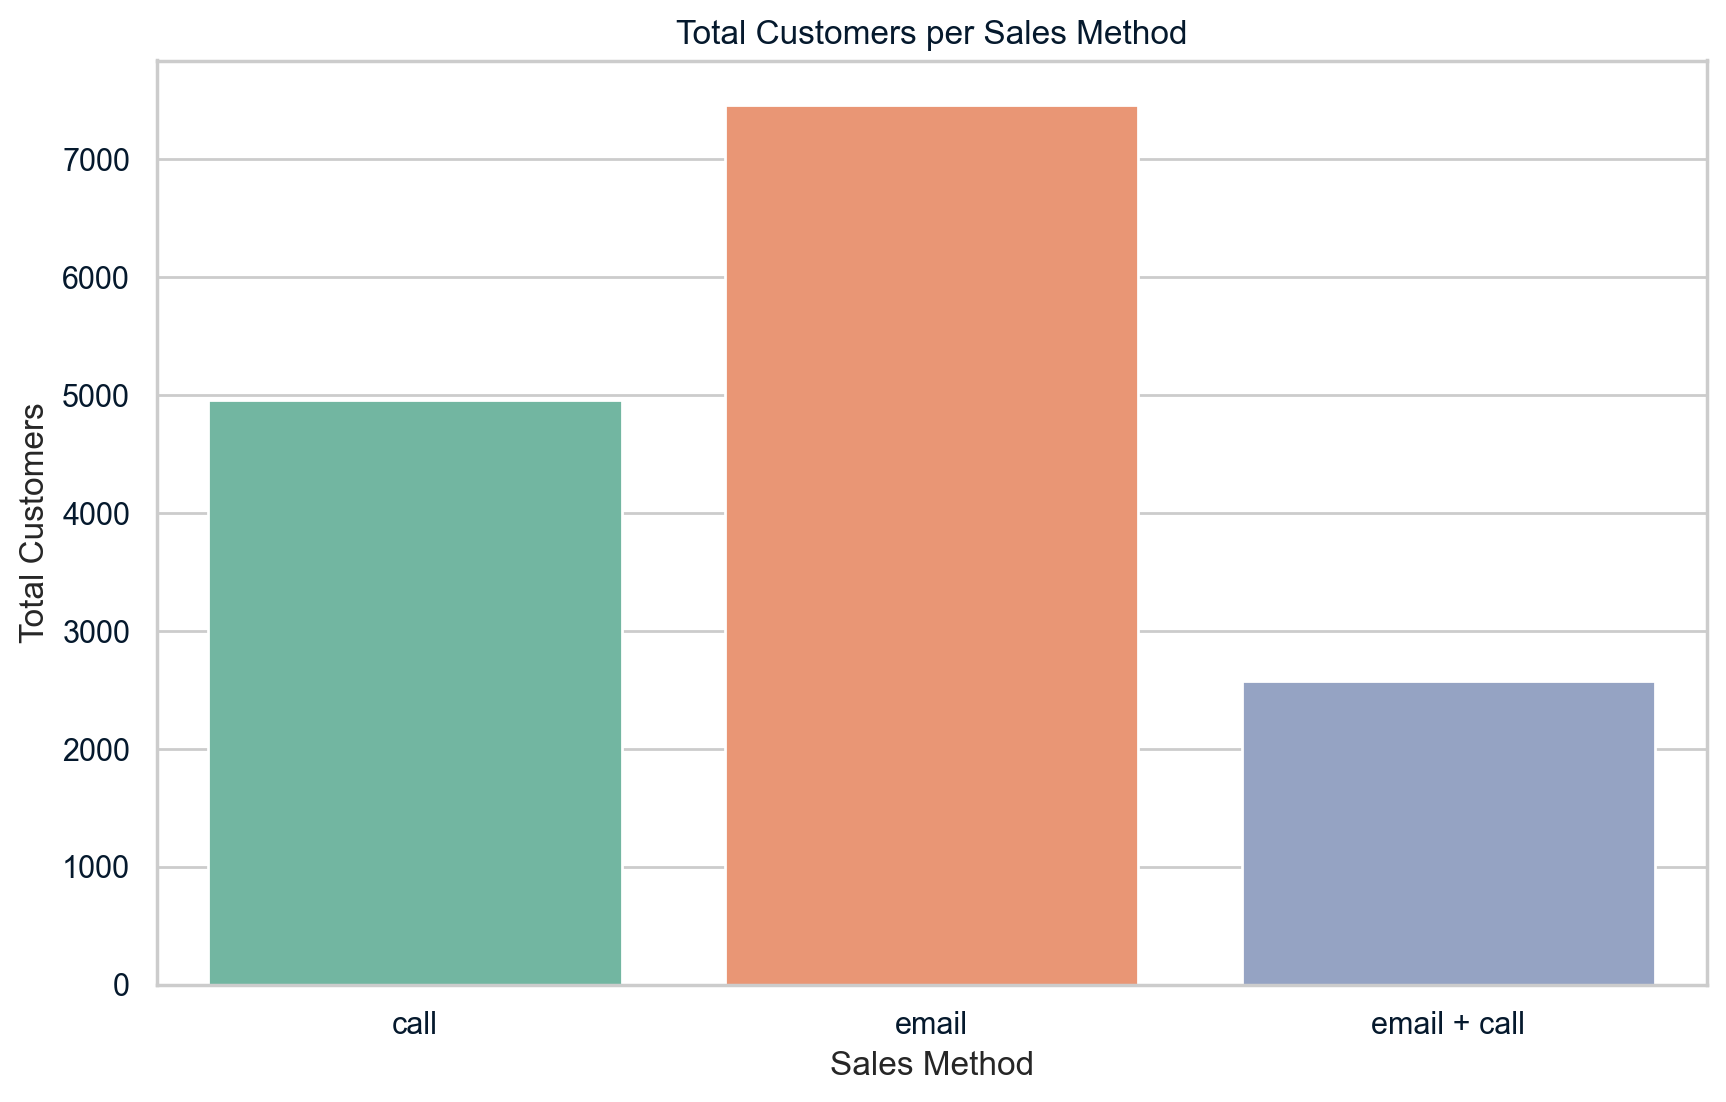

In [66]:
## Visualize total customers per sales_method

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='nb_customers', data=method_summary, errorbar=None, hue='sales_method', palette='Set2')
plt.title('Total Customers per Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Customers')
plt.show()

# Visualizing Spread of Total Revenue

The histogram shows how often different revenue amounts occur. Most sales make around \$90, which is close to both the average (mean) and the middle value (median). The chart is right-skewed, meaning there are some higher revenue amounts but they are less common.

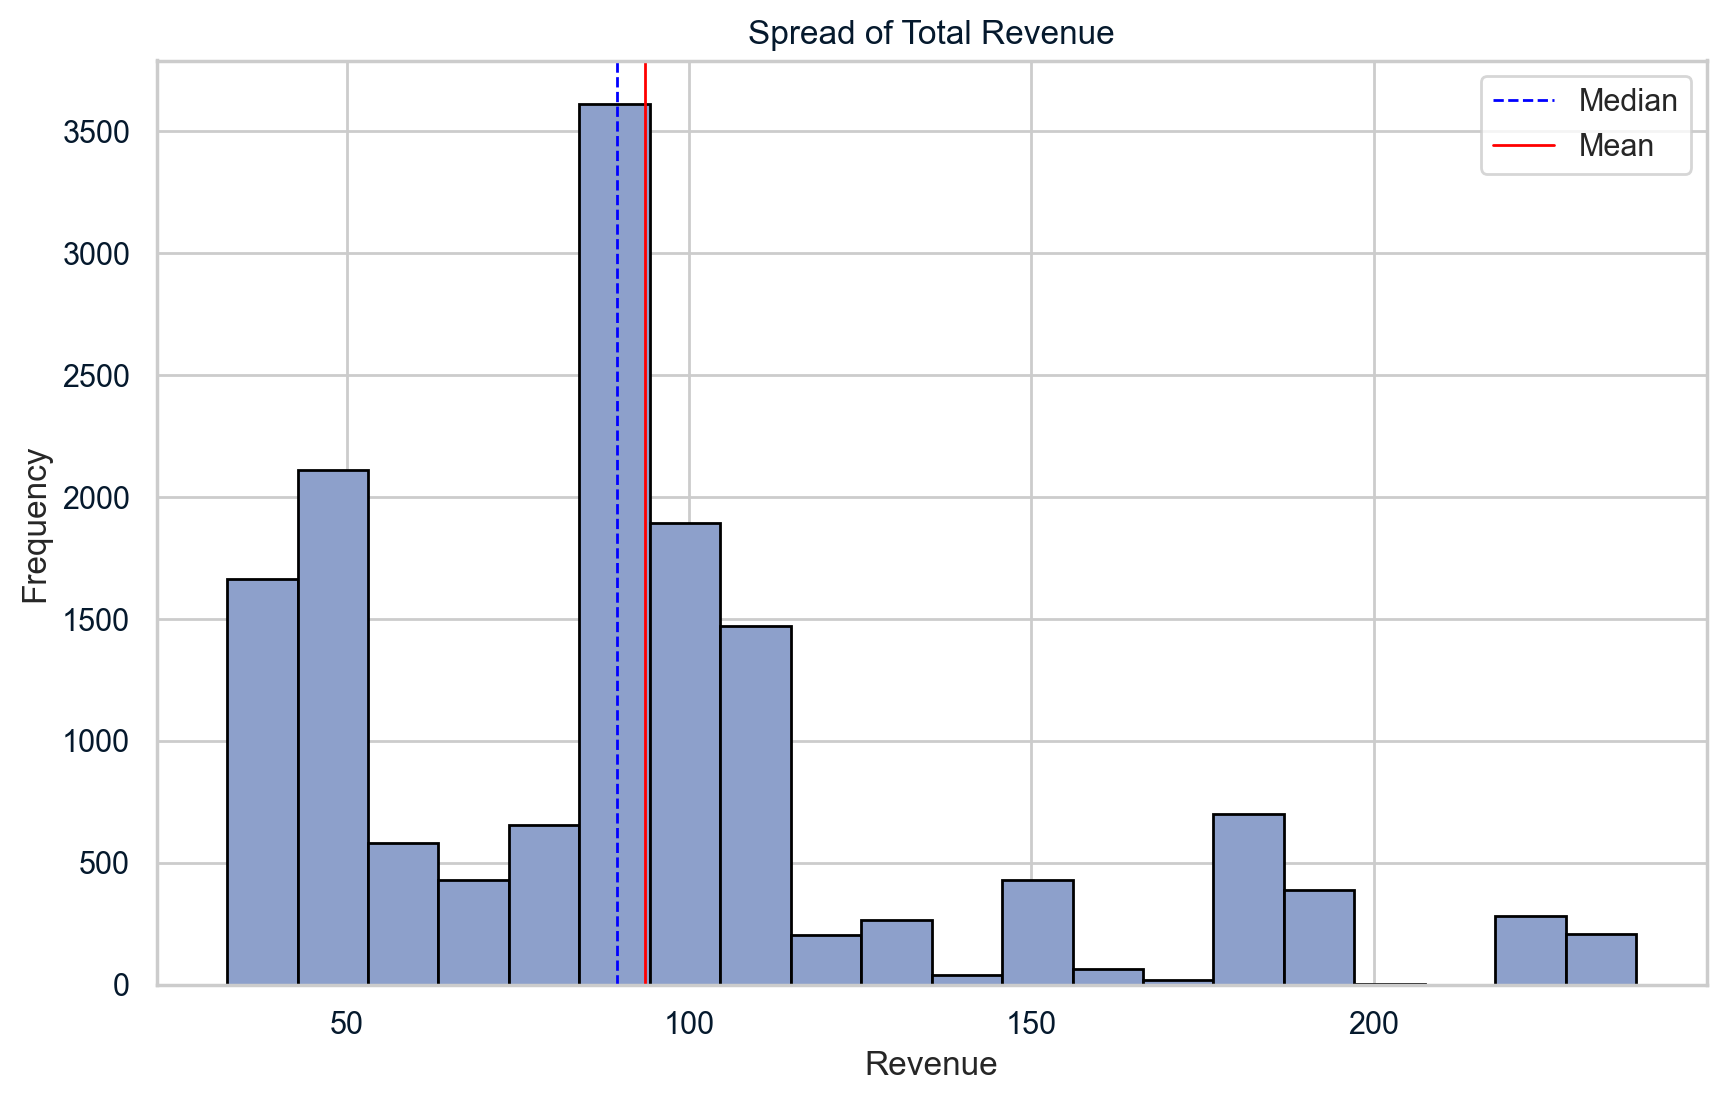

In [67]:
# Calculate median, mean, and grabbing revenue data
mean_rev = df['revenue'].mean()
median_rev = df['revenue'].median()
revenue_data = df['revenue']

# Plotting histogram for Revenue
plt.figure(figsize=(10, 6))
plt.hist(revenue_data, bins=20, color='#8da0cb', edgecolor='black')
plt.axvline(median_rev, color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mean_rev, color='red', linestyle='solid', linewidth=1, label='Mean')
plt.title('Spread of Total Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Revenue Distribution by Sales Method

The bar plot shows the average and median revenue for three sales methods.
- Email + Call method generated the highest mean revenue of \$170.88.
- Call had the lowest mean revenue of \$49.13.

The mean and median values are close for each method, indicating consistent revenue performance within each sales method.

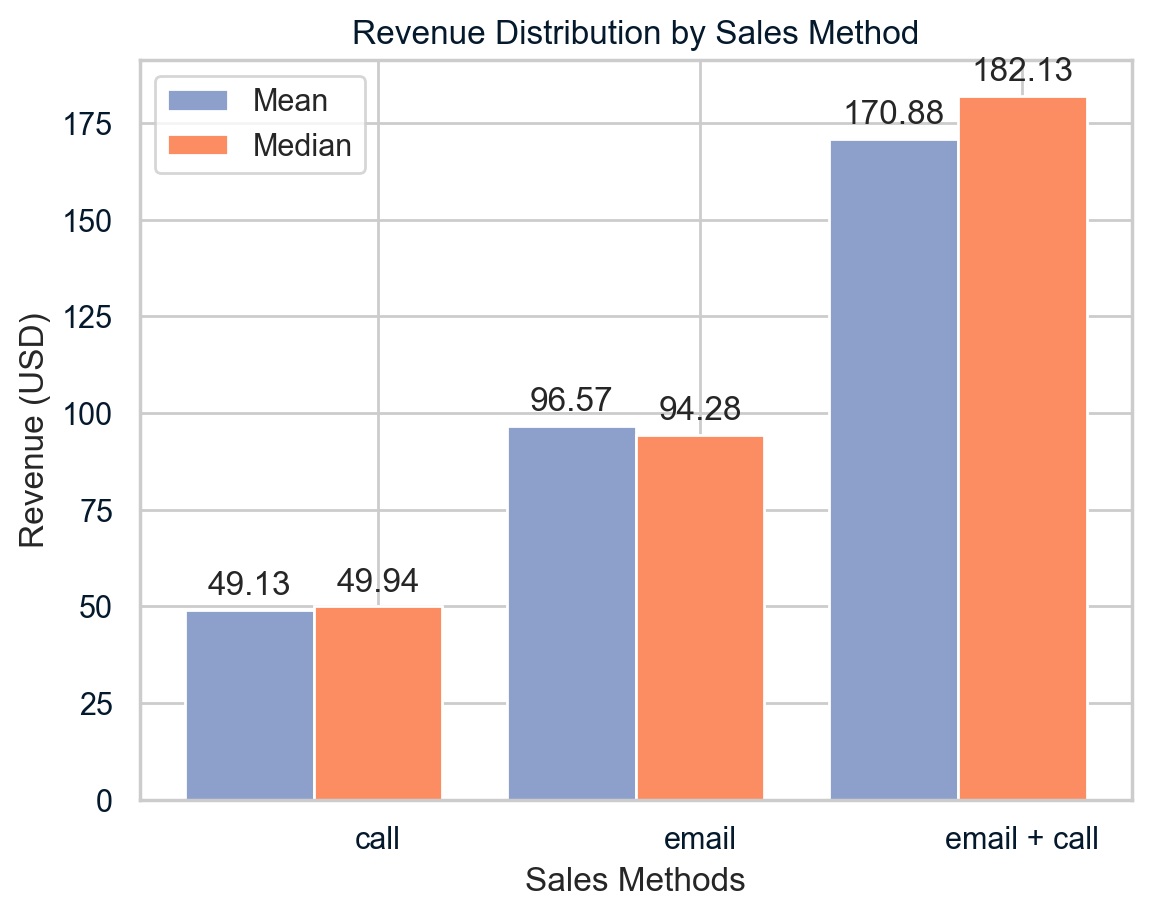

In [77]:
# Calculate statistics per sales method
mean_revenue_per_method = df.groupby('sales_method')['revenue'].mean()
median_revenue_per_method = df.groupby('sales_method')['revenue'].median()

# Data for plotting
categories = mean_revenue_per_method.index
mean_values = mean_revenue_per_method.values
median_values = median_revenue_per_method.values


# Define colors
color = ['#8da0cb', '#fc8d62']  # Same color for both mean and median

# Plotting
x = np.arange(len(categories))
width = 0.4

fig, ax = plt.subplots()

bars1 = ax.bar(x - width, mean_values, width, label='Mean', color=color[0])
bars2 = ax.bar(x, median_values, width, label='Median', color=color[1])

# Adding labels
ax.set_xlabel('Sales Methods')
ax.set_ylabel('Revenue (USD)')
ax.set_title('Revenue Distribution by Sales Method')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

add_labels(bars1)
add_labels(bars2)

plt.show()


# Total Revenue per Sales Methods

This bar plot compares revenue from three sales methods.
Email generated the most revenue, over \$700,000, while call generated the least, just above \$200,000.

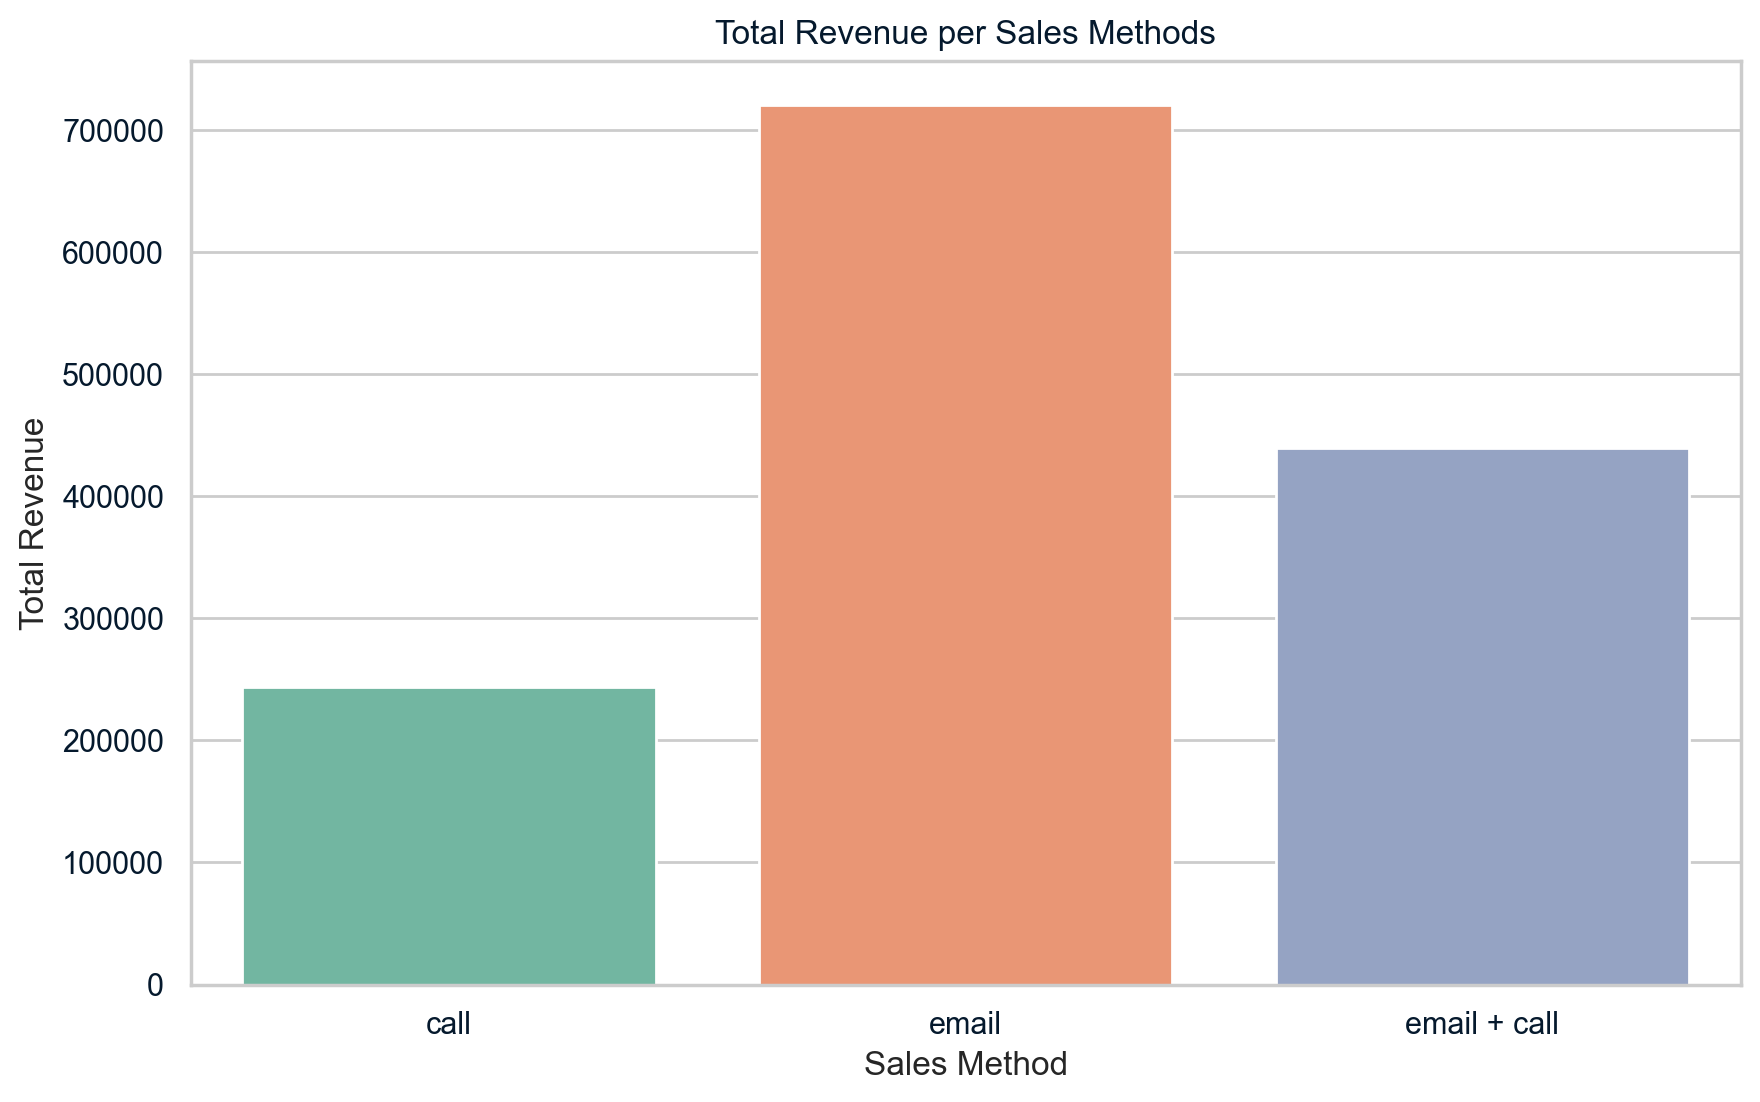

In [42]:
## Visualize the spread of the revenue overall, and for each method

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='revenue', data=method_summary, errorbar=None, hue='sales_method', palette='Set2')
plt.title('Total Revenue per Sales Methods')
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.show()

# Visualizing Spread of Revenue per Sales Method

The box plot shows how much money each sales method makes.

- Email + Call makes the most money on average but also has the most ups and downs.

- The dots are outliers, meaning they are unusual amounts of money compared to the rest.

Email and Call make less money on average and are more steady, with fewer unusual amounts.

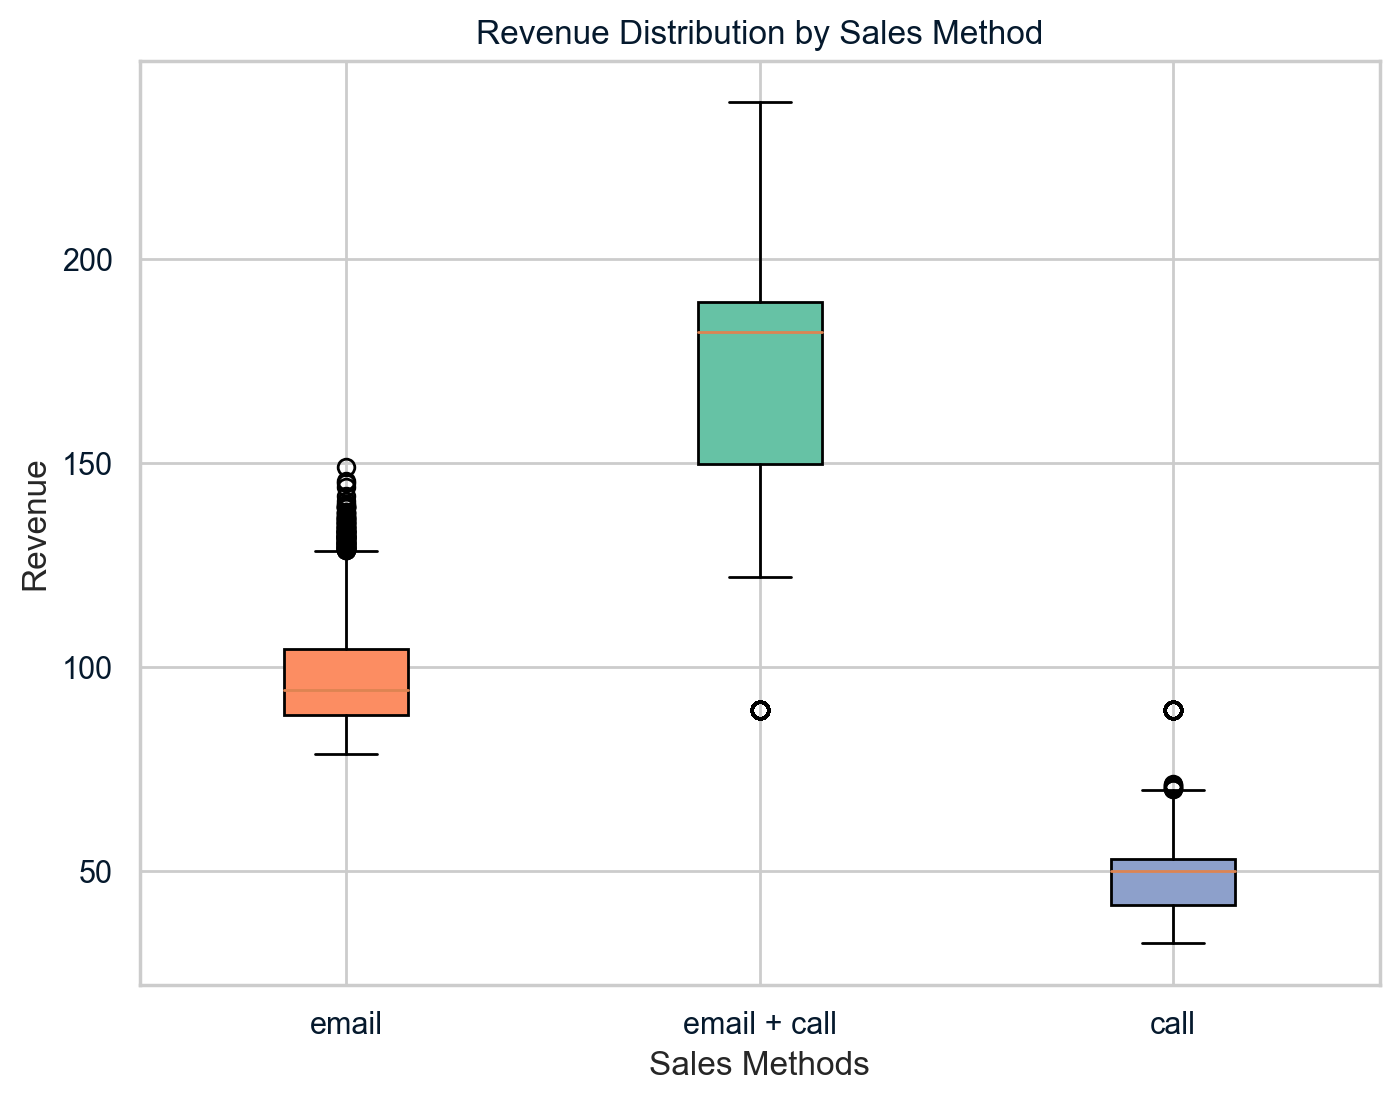

In [79]:
# Group by sales method and collect revenue data
data_per_method = [df[df['sales_method'] == method]['revenue'] for method in df['sales_method'].unique()]

# Plotting
plt.figure(figsize=(8, 6))

# Create a box plot
bp = plt.boxplot(data_per_method, patch_artist=True, labels=df['sales_method'].unique())

# Define colors for each category
colors = ['#fc8d62', '#66c2a5', '#8da0cb']

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Adding labels
plt.xlabel('Sales Methods')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Sales Method')

plt.show()

# Revenue by Sales Method Over 6 Weeks

The bar plot shows the revenue generated by three different sales methods over six weeks.

While the email method started off the strongest, combining email and calls became more effective over time, especially in the last two weeks.

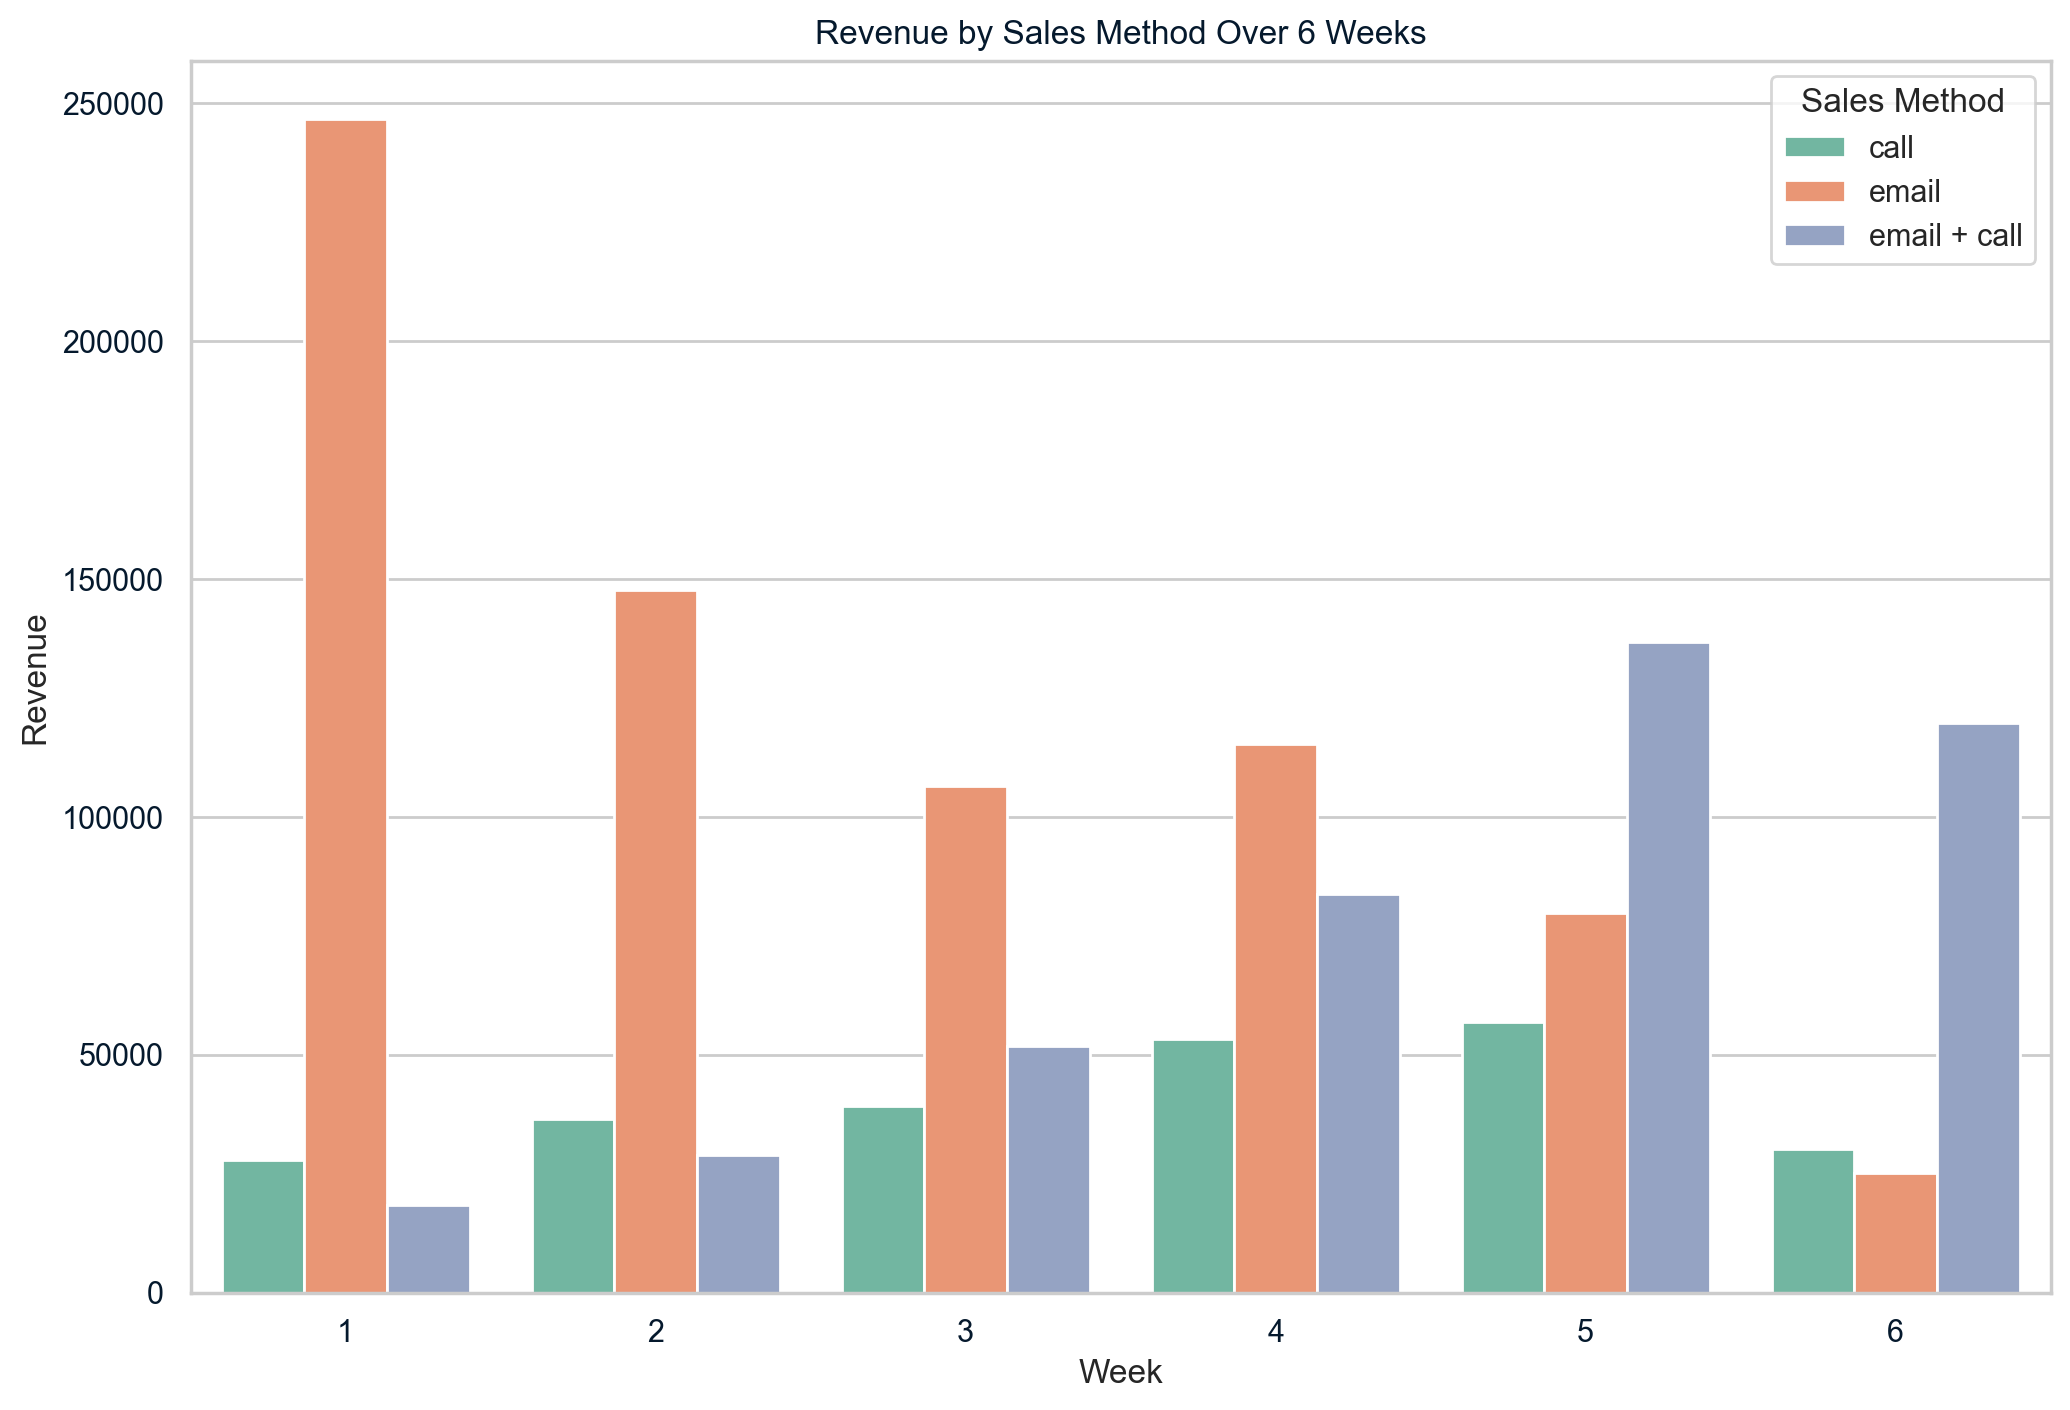

In [44]:
## Bar Plot of total revenue over time for each sales method

# Group by sales_method and week, then sum the revenue
grouped_df = df.groupby(['sales_method', 'week']).agg({'revenue': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_df, x='week', y='revenue', hue='sales_method', palette='Set2')

# Labels and title
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue by Sales Method Over 6 Weeks')
plt.legend(title='Sales Method')
plt.show()

In [45]:
# Adding the sales_efficiency column showing revenue per unit sold
method_summary['sales_efficiency'] = method_summary['revenue'] / method_summary['nb_sold']
method_summary

,sales_method,nb_sold,revenue,nb_customers,years_as_customer,nb_site_visits,sales_efficiency
0,call,47187,243762.99,4962,5.176743,24.423821,5.165893
1,email,72639,721005.83,7466,4.983793,24.754353,9.925878
2,email + call,31444,439492.19,2572,4.507387,26.771384,13.976981


# Business Metric Definition and Monitoring

Choosing the Best Sales Method for a New Product Launch

### Key Metric: Sales Efficiency
- Definition: Sales Efficiency measures how much revenue is generated per unit sold. It helps the business understand the effectiveness of their sales methods.

### How to Monitor:
1.  **Track Revenue and Units Sold:** Regularly record the total revenue and the number of units sold for each sales method.
2.  **Calculate Sales Efficiency:** Use the formula to compute the Sales Efficiency for each method showing revenue per unit sold.
3. **Compare Methods:** Look at which sales method has the highest Sales Efficiency. This method is currently the most effective.

### Formula: 

$$\text{Sales Efficency}={\text{Total Revenue}\over \text{Number of Units Sold}}$$

# Sales Efficiency (Revenue per Unit Sold) by Sales Method

The Email + Call method has the highest sales efficiency, indicating it generates the most revenue per unit sold.

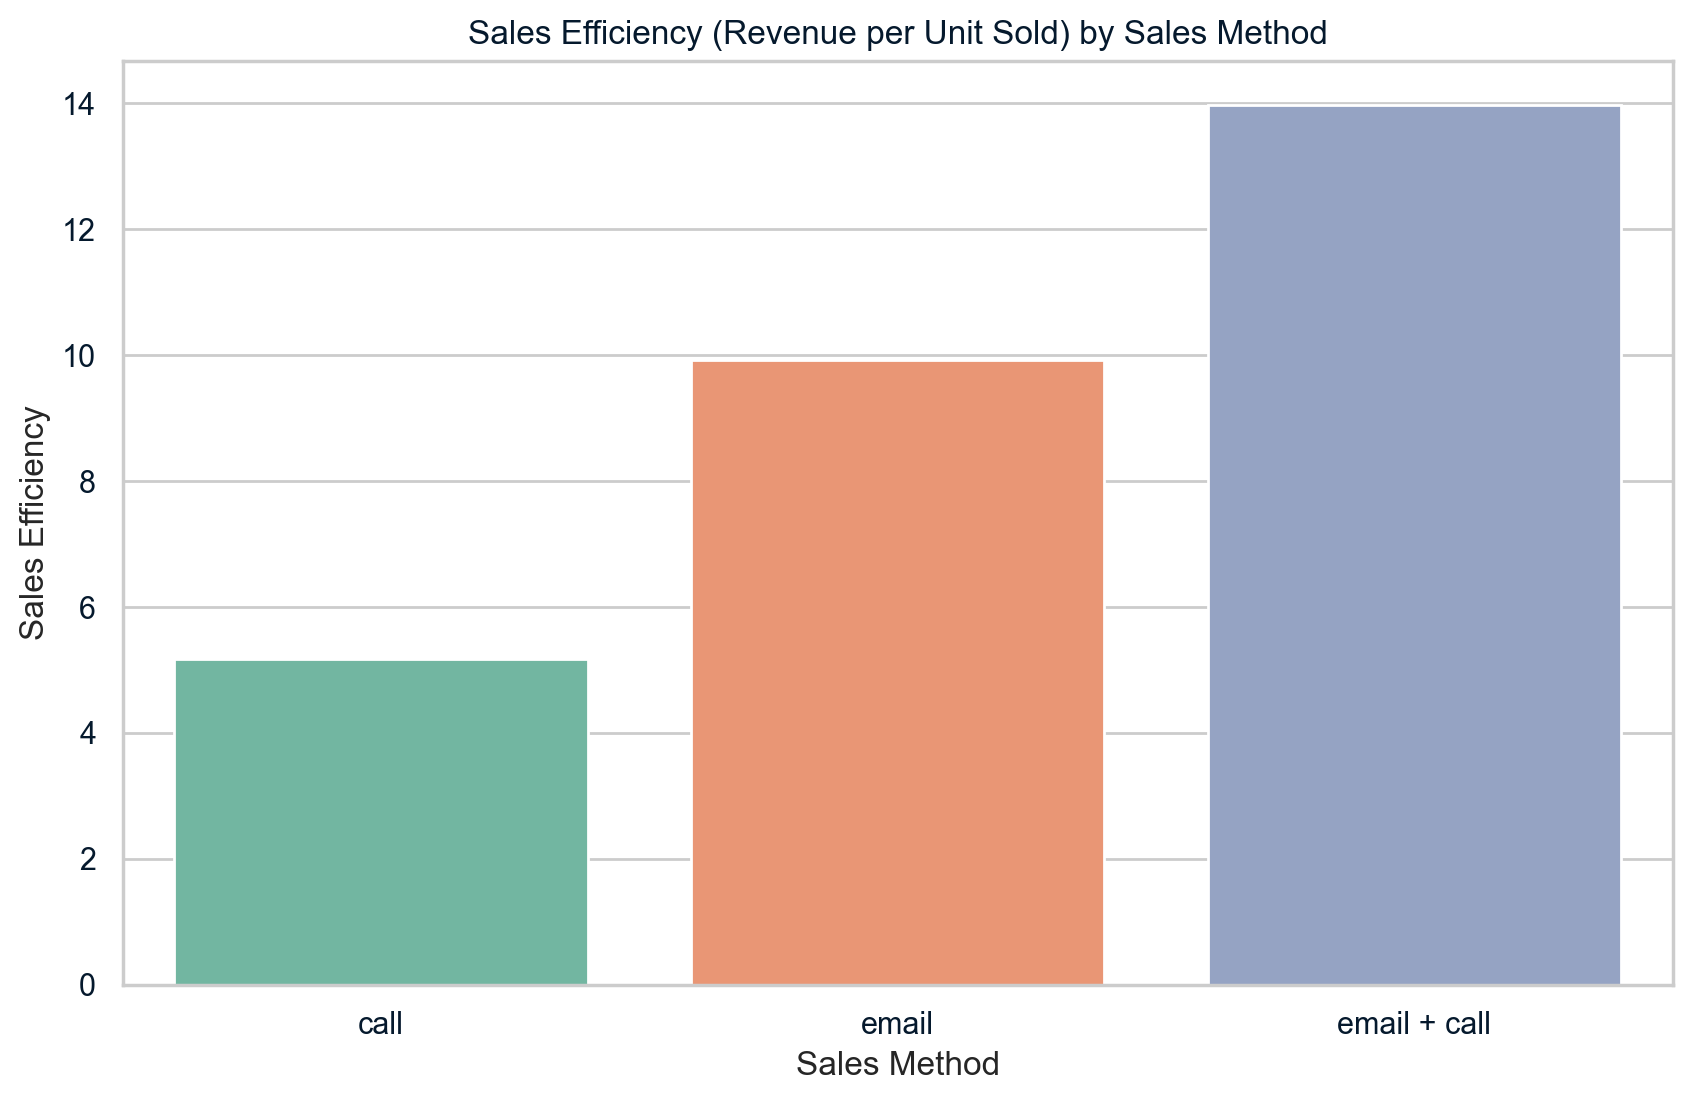

In [46]:
## Visualize the sales_efficiency by each sales_method

# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_method', y='sales_efficiency', data=method_summary, ci=None, palette='Set2')
plt.title('Sales Efficiency (Revenue per Unit Sold) by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Sales Efficiency')
plt.show()

# Final Analysis:
To determine the best sales method for the new product launch, we need to consider both the sales efficiency and the workload involved. Here's an analysis of each method:

### Email:

- Sales Efficiency: $9.93 (revenue per unit sold)
- Workload: Very low
- High efficiency and low effort make this method highly attractive. It is suitable for large-scale, low-maintenance sales.


### Call:

- Sales Efficiency: $5.17 (revenue per unit sold)
- Workload: High (30 minutes per customer)
- Although this method has the lowest sales efficiency, it may be necessary for products requiring detailed explanations or personalized service. However, it is labor-intensive.

### Email + Call:

- Sales Efficiency: $13.98 (revenue per unit sold)
- Workload: Moderate (10 minutes per customer)
- This method has the highest sales efficiency and a moderate workload. It combines the benefits of both methods, making it ideal for products that benefit from some personal interaction but do not require extensive effort.

## Recommendation:
Based on the analysis, I suggest utilizing the Email + Call method for selling the new office stationery line. Despite bringing in fewer customers initially, this method generated the highest mean revenue per unit sold, indicating its effectiveness in maximizing sales efficiency. This approach will balances effective customer reach with personalized engagement, leading to higher revenue per unit sold.

For the next few weeks, watch these methods and change plans based on how they are doing to make the best use of time and resources.

## For future in-depth analysis:
Enhance data collection by determining the average time spent on email sales per customer to assess revenue per time spent.
Gather more data on sales method effectiveness in attracting new versus repeat customers for further insights into customer acquisition strategies.





